In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score
import pandas as pd

from project_models import LogisticHateSpeech, HateSpeechRFClassifier, LassoHateSpeech, HateSpeechXGBClassifier, KNNHateSpeechClassifier, RidgeHateSpeech

In [8]:
train_df = pd.read_csv("../data/train_data.csv")
test_df = pd.read_csv("../data/test_data.csv", sep=";")

X_train = train_df["text"]
y_train = train_df["label"]
X_test = test_df["comment"]
y_test = (test_df["isHate"] >= 0.25).astype(int)

In [9]:
models = [
    ("Lasso", LassoHateSpeech()),
    ("Logistic", LogisticHateSpeech()),
    ("Ridge", RidgeHateSpeech()),
    ("KNN", KNNHateSpeechClassifier()),
    ("XGBoost", HateSpeechXGBClassifier()),
    ("Random Forest", HateSpeechRFClassifier())
]


AttributeError: 'KNNHateSpeechClassifier' object has no attribute 'train'

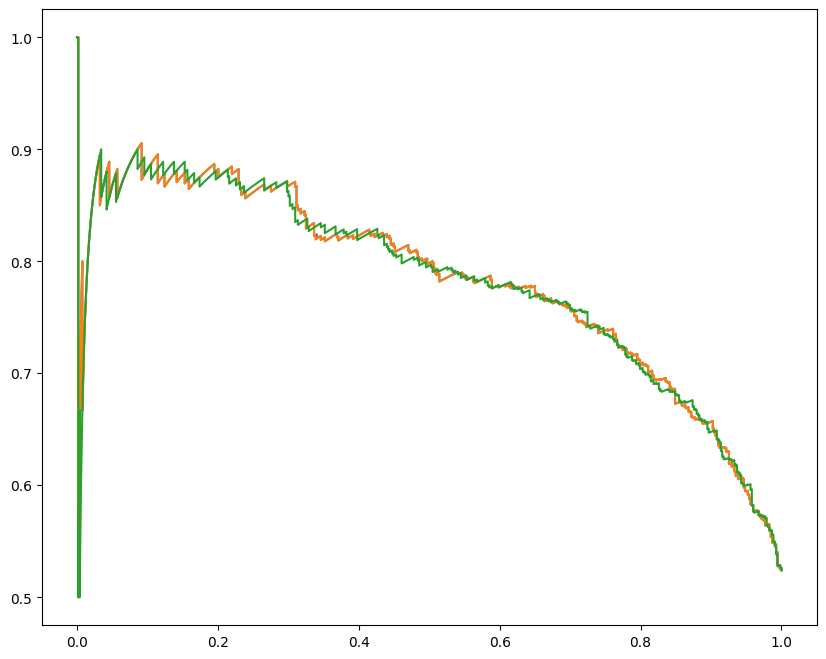

In [10]:
plt.figure(figsize=(10, 8))

for name, model in models:
    model.train(X_train, y_train)
    proba = model.predict_proba(X_test)
    if isinstance(proba, pd.Series):
        proba = proba.values

    precision, recall, _ = precision_recall_curve(y_test, proba)
    ap_score = average_precision_score(y_test, proba)
    plt.plot(recall, precision, label=f"{name} (AP = {ap_score:.2f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve Comparison")
plt.legend(loc="lower left")
plt.grid(True)
plt.show()